In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [2]:
# import some data to play with
iris = pd.read_csv('/home/aman/Downloads/Learning/Data science/Decision tree/iris.csv',index_col=0)

In [3]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [4]:
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [8]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [10]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [13]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [14]:
y

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [15]:
iris['Species'].unique()

array([0, 1, 2])

In [16]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [17]:
colnames = list(iris.columns)
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Build Decision Tree Classifier using Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

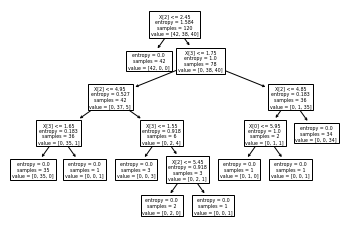

In [23]:
# PLot the decision tree
tree.plot_tree(model);

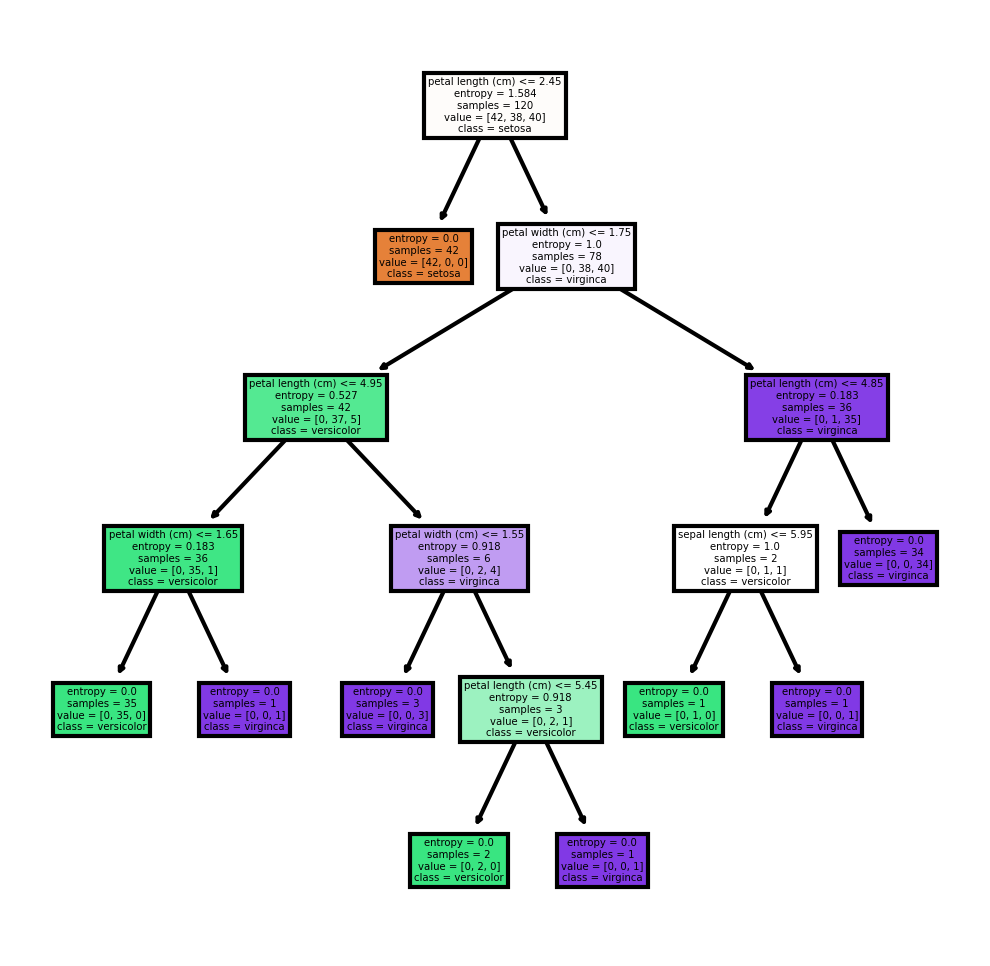

In [24]:
fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['setosa', 'versicolor', 'virginca']
fig, axes = plt.subplots(nrows= 1, ncols=1, figsize= (4,4), dpi=300)
tree.plot_tree(model,
                feature_names = fn,
                class_names = cn,
                filled = True);

In [25]:
# predicting on test data
preds = model.predict(x_test) #predicting on test data
pd.Series(preds).value_counts() #getting the count of each category


1    12
2    10
0     8
dtype: int64

In [65]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [67]:
y_test

39     0
67     1
116    2
118    2
90     1
137    2
69     1
95     1
85     1
29     0
91     1
12     0
41     0
127    2
80     1
145    2
124    2
125    2
77     1
60     1
133    2
106    2
54     1
18     0
65     1
19     0
14     0
117    2
10     0
82     1
Name: Species, dtype: int64

In [68]:
x_test

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
39,4.4,3.0,1.3,0.2
67,5.6,3.0,4.5,1.5
116,6.4,3.2,5.3,2.3
118,7.7,3.8,6.7,2.2
90,5.5,2.5,4.0,1.3
137,6.3,3.4,5.6,2.4
69,6.2,2.2,4.5,1.5
95,5.6,2.7,4.2,1.3
85,5.4,3.0,4.5,1.5
29,5.2,3.4,1.4,0.2


In [26]:
pd.crosstab(y_test, preds) #getting the 2 way tables to understand the correct and wrong prediction

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [27]:
# Accuracy
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier(CART) using Gini Criteria

In [29]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [30]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
# prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(pred==y_test)

1.0

# Decision Tree Regression Example

In [32]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [40]:
array = iris.values
x = array[:,0:3]
y = array[:,3]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=1)

In [49]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
# Find the accuracy
model.score(X_test, y_test)

0.8810631528394766